In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split

## Import Dataset with generated labels and with true labels

In [144]:
train_labeled = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Output/Snorkel/labeled_df_train.csv')
## Plot confusion matrices - Train Set

In [145]:
def generate_train_dev_test_split(df):
    """
    Generate train dev test split
    :param df: Dataset to split
    :type df: DataFrame
    :return: Returns three datasets
    :rtype: DataFrame, DataFrame, DataFrame
    """

    # Split into 60% train, 20% dev and 20% test
    rest, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True, stratify=df.POPULIST)
    train, dev = train_test_split(rest, test_size=0.1, random_state=42, shuffle=True, stratify=rest.POPULIST)

    return train, dev, test

In [146]:
nccr_df_prep = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Output/NCCR_combined_corpus_DE_wording_available_prep.csv')

# Generate Train, Dev, Test Split
train, dev, test = generate_train_dev_test_split(nccr_df_prep)

In [147]:
train_labeled.set_index('Unnamed: 0', inplace=True)

In [148]:
merged_df = train_labeled.join(train)

## Plot confusion matrices - Train Set

### Overall

In [149]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

In [153]:
y_true = merged_df.POPULIST
y_pred = merged_df.label
cm = confusion_matrix(y_true, y_pred)
display_labels = [0,1]

In [154]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.03      0.06      1696
         1.0       0.32      0.99      0.49       789

    accuracy                           0.34      2485
   macro avg       0.63      0.51      0.27      2485
weighted avg       0.74      0.34      0.20      2485



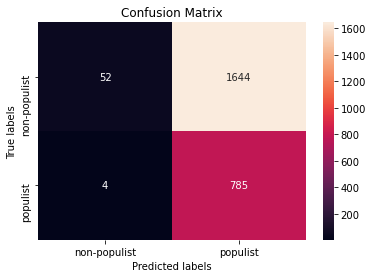

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['non-populist', 'populist']); ax.yaxis.set_ticklabels(['non-populist', 'populist']);
plt.savefig('cm_label_model_all.png')

### Per dimension (AE,PC,Sov)

In [156]:
merged_df_pc = merged_df.loc[merged_df.POPULIST_PeopleCent == 1]
merged_df_ae = merged_df.loc[merged_df.POPULIST_AntiElite == 1]
merged_df_sov = merged_df.loc[merged_df.POPULIST_Sovereign == 1]
merged_df_sov['POPULIST'] = merged_df_sov.POPULIST.astype(int)
merged_df_sov['label'] = merged_df_sov.label.astype(int)

<ipython-input-156-56a9a00bf5e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_sov['POPULIST'] = merged_df_sov.POPULIST.astype(int)
<ipython-input-156-56a9a00bf5e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_sov['label'] = merged_df_sov.label.astype(int)


In [157]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

In [158]:
def plot_cm(df, name):
    
    y_true = df.POPULIST
    y_pred = df.label
    
    cm = confusion_matrix(y_true, y_pred)
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix '+ name); 
    ax.xaxis.set_ticklabels(['non-populist', 'populist']); ax.yaxis.set_ticklabels(['non-populist', 'populist']);
    plt.savefig('cm_label_model_' + name + '.png')

In [159]:
def plot_cm_sgl(df, name):
    
    y_true = df.POPULIST
    y_pred = df.label
    
    cm = confusion_matrix(y_true, y_pred)
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix '+ name); 
    ax.xaxis.set_ticklabels(['populist']); ax.yaxis.set_ticklabels(['populist']);
    plt.savefig('cm_label_model_' + name + '.png')


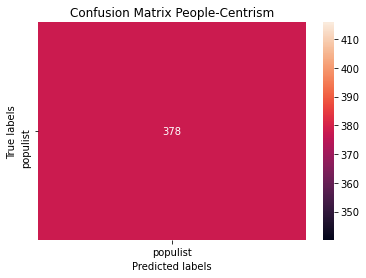

In [160]:
plot_cm_sgl(merged_df_pc, 'People-Centrism')

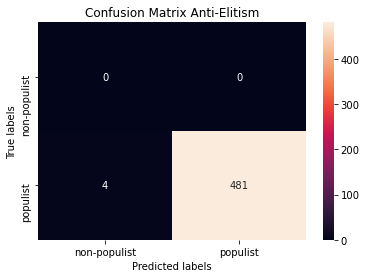

In [161]:
plot_cm(merged_df_ae, 'Anti-Elitism')

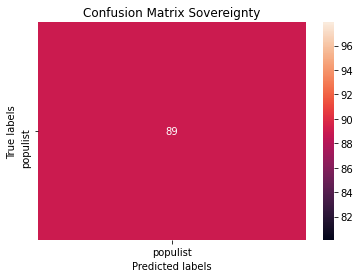

In [162]:
plot_cm_sgl(merged_df_sov, 'Sovereignty')

In [186]:
from sklearn.metrics import roc_curve, precision_recall_curve

In [188]:
train_prob = pd.read_csv('C:/Users/dschw/Documents/file.csv')

In [189]:
train_prob = train_prob['1'].to_list()

In [212]:
tpr, fpr, thresholds = roc_curve(train.POPULIST.to_list(),train_prob)

In [213]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.9999850006894022

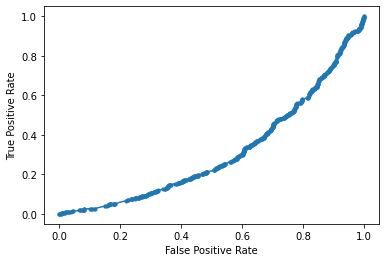

In [216]:
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
class_balanc